     Average Rt(min)  Average Mz  \
0              8.228    678.2912   
1              8.228    678.2912   
2              8.228    678.2912   
3              8.228    678.2912   
4              8.228    678.2912   
..               ...         ...   
210            8.228    678.2912   
211            8.228    678.2912   
212            8.228    678.2912   
213            8.228    678.2912   
214            8.228    678.2912   

                                           Sample Name       Area  
0    20210701_50220_V-10_Ro-65_R-1_Pos_Ironman_H2O-...   92483376  
1    20210701_50220_V-11_Ro-55_R-1_Pos_Ironman_H2O-...   95549320  
2    20210701_50220_V-12_Ro-61_R-1_Pos_Ironman_H2O-...   95409432  
3    20210701_50220_V-15_Ro-26_R-1_Pos_Ironman_H2O-...  104141208  
4    20210701_50220_V-16_Ro-45_R-1_Pos_Ironman_H2O-...   92620520  
..                                                 ...        ...  
210  20210707_50220_V-97_Ro-047_R-2_Pos_Ironman_H2O...   96854552  
211  20210707_50220_V-9

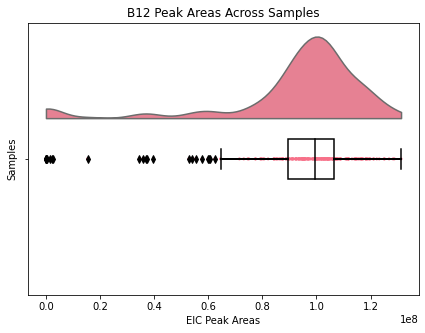

In [1]:
#import pandas module
import pandas as pd 
import numpy as np
import ptitprince as pt
import matplotlib.pyplot as plt 
import seaborn as sns


#creating a dataframe
metabolites = pd.read_csv("LLNL_alignment2021July.csv")
#filtering for our internal standard. Specify RT and m/z
b12 = metabolites[(metabolites["Average Rt(min)"] == 8.228 )& (metabolites["Average Mz"] == 678.2912)]
#Dropping unnecesary columns. This section varies depending on type of csv
b12 = b12.iloc[:, np.r_[1,2,32: 247]]
b12 = b12.melt(id_vars=['Average Rt(min)','Average Mz'], var_name=('Sample Name'),value_name=('Area'))
print(b12)
###Creating a raincloud (combination of half-violin, box, and strip plots)
f, ax = plt.subplots(figsize=(7, 5))
dx="Area"; ort="h"; pal = sns.color_palette("husl")
ax=pt.half_violinplot( x = dx, data = b12, palette = pal, bw = .2, cut = 0.,scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, data = b12, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, data = b12, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)                
plt.title("B12 Peak Areas Across Samples")
plt.xlabel("EIC Peak Areas")
plt.ylabel("Samples")
plt.savefig("B12_Distribution Across Samples.png")




In [2]:
# #Remove samples below the threshold using IQR
Q1 = b12['Area'].quantile(0.25)
Q3 = b12['Area'].quantile(0.75)
IQR = Q3-Q1

b12_out = (b12['Area'] >= Q1 - 1.5 * IQR) & (b12['Area'] <= Q3 + 1.5 *IQR)
b12_filter = b12.loc[b12_out]
b12_filter


,Average Rt(min),Average Mz,Sample Name,Area
0,8.228,678.2912,20210701_50220_V-10_Ro-65_R-1_Pos_Ironman_H2O-...,92483376
1,8.228,678.2912,20210701_50220_V-11_Ro-55_R-1_Pos_Ironman_H2O-...,95549320
2,8.228,678.2912,20210701_50220_V-12_Ro-61_R-1_Pos_Ironman_H2O-...,95409432
3,8.228,678.2912,20210701_50220_V-15_Ro-26_R-1_Pos_Ironman_H2O-...,104141208
4,8.228,678.2912,20210701_50220_V-16_Ro-45_R-1_Pos_Ironman_H2O-...,92620520
...,...,...,...,...
209,8.228,678.2912,20210707_50220_V-96_Ro-064_R-2_Pos_Ironman_H2O...,113135616
210,8.228,678.2912,20210707_50220_V-97_Ro-047_R-2_Pos_Ironman_H2O...,96854552
212,8.228,678.2912,20210707_50220_V-99_Ro-093_R-2_Pos_Ironman_H2O...,73139832
213,8.228,678.2912,20210707_50220_V-100_Ro-006_R-2_Pos_Ironman_H2...,95336312


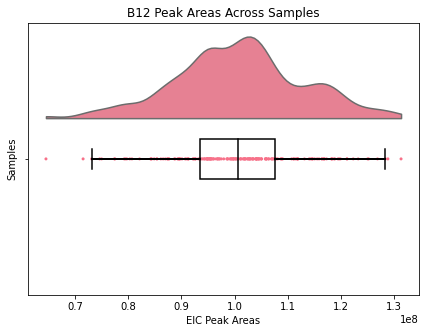

In [3]:
#Creating new raincloud with filtered data 
f, ax = plt.subplots(figsize=(7, 5))
dx="Area"; ort="h"; pal = sns.color_palette("husl")
ax=pt.half_violinplot( x = dx, data = b12_filter, palette = pal, bw = .2, cut = 0.,scale = "area", width = .6, inner = None, orient = ort)
ax=sns.boxplot( x = dx, data = b12_filter, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort) 
ax=sns.stripplot( x = dx, data = b12_filter, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = ort)               
plt.title("B12 Peak Areas Across Samples")
plt.xlabel("EIC Peak Areas")
plt.ylabel("Samples")
plt.savefig("Distribution Across Samples_QC.png")

In [115]:
#Performing shapiro test to determine if data is normally distributed 
import scipy.stats as stats
w, pvalue = stats.shapiro(b12_filter['Area'])
w, pvalue

#p > 0.05 so data may be normally distributed 

(0.9946542382240295, 0.7294902801513672)

In [4]:
from datetime import datetime
#Filtering alignment table using the list of quality checked samples. Output is a new dataframe for an alignment table containing only quality checked samples
head_met= metabolites.iloc[:,32:]
for col in head_met.columns:
    if col not in b12_filter['Sample Name'].unique(): 
        head_met.drop(columns=[col], inplace=True) 
#print(head_met)
metabolites = metabolites.iloc[:,0:4]
metabolites_filter = pd.concat([metabolites, head_met], axis=1)
#print(metabolites_filter)
#Save new filtered alingment table. Specifiy the required name
now_ = datetime.now().strftime('%b_ %d_ %y_ %H_%M_%S')
metabolites_filter.to_csv('LLNL_Alignment_results_' + now_ + '.csv')

In [8]:
#Renaming alignment table with condition name, only for LLNL samples
vials = pd.read_csv("Boiteaulab_LCMS_samples_June_2021.csv")
metabolites_filt = metabolites_filter.rename(columns=dict(zip(vials['File name'], vials['Sample'])))
#for col in metabolites_filter.columns:
    #if col in vials['File name'].unique(): 
        #col.rename(columns='sample_name')
metabolites_filt
#metabolites_filt.to_csv('LLNL_Alignment_results_Renamed.csv')

In [112]:
#Create a subset of a dataframe with desired conditions 
import scipy.stats as stats
from scipy.stats import ranksums

subset = metabolites_filt.iloc[:, [0,1,2,3,7,8,9,17,85,86]].copy()
#Create Groups with the conditions treatments, calculate their means and add them to subset dataframe.
#Group A is Ax 0uM and Group B is ARWIT 0.01uM
groupA = subset.iloc[:,4:7].values
subset['Average Group A'] = groupA.mean(axis=1)
groupB = subset.iloc[:,7:10].values
subset['Average Group B'] = groupB.mean(axis=1)

subset

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Ax #1 0 uM Fe,Ax #2 0 uM Fe,Ax #3 0 uM Fe,ARW1T #2 0.01 uM Fe,ARW1T #1 0.01 uM Fe,ARW1T #3 0.01 uM Fe,Average Group A,Average Group B
0,0,1.651,100.02436,Unknown,14904,893,11970,19040,5357,19699,9255.666667,14698.666667
1,1,7.006,100.04739,Unknown,16773,13455,12874,17860,6987,13135,14367.333333,12660.666667
2,2,18.425,100.04743,Unknown,921,6109,2586,2029,5821,5887,3205.333333,4579.000000
3,3,4.670,100.07570,Unknown,127958,490454,391738,86969,88338,201985,336716.666667,125764.000000
4,4,1.527,100.07570,Unknown,4276,3313,11970,1208,4081,5136,6519.666667,3475.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
34391,34391,1.204,998.30920,Unknown,9286,0,0,0,0,0,3095.333333,0.000000
34392,34392,24.460,998.32764,Unknown,0,0,0,0,0,0,0.000000,0.000000
34393,34393,24.667,998.77240,Unknown,0,0,0,0,0,0,0.000000,0.000000
34394,34394,24.150,999.32922,Unknown,0,0,0,0,0,0,0.000000,0.000000


In [116]:
##Conditionally drop noisy features if mean of group A or B is < 20000

threshold=20000
subset_filter = subset[ (subset['Average Group A'] >threshold) & (subset['Average Group B'] >threshold)]
subset_filter


,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Ax #1 0 uM Fe,Ax #2 0 uM Fe,Ax #3 0 uM Fe,ARW1T #2 0.01 uM Fe,ARW1T #1 0.01 uM Fe,ARW1T #3 0.01 uM Fe,Average Group A,Average Group B
3,3,4.670,100.07570,Unknown,127958,490454,391738,86969,88338,201985,3.367167e+05,1.257640e+05
23,23,1.549,101.00837,Unknown,5483582,235369,642835,14255624,1182533,2606223,2.120595e+06,6.014793e+06
25,25,2.567,101.00838,Unknown,361069,235369,98479,495976,1182533,2606223,2.316390e+05,1.428244e+06
31,31,10.248,101.05969,Unknown,124948,124508,109531,103664,118054,99247,1.196623e+05,1.069883e+05
32,32,6.329,101.05969,Unknown,196101,284390,240437,181654,39207,192586,2.403093e+05,1.378157e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
34291,34291,13.125,983.88416,Unknown,22991,22323,17275,26871,14168,64962,2.086300e+04,3.533367e+04
34294,34294,1.180,984.32959,Unknown,183127,0,0,83622,0,0,6.104233e+04,2.787400e+04
34295,34295,1.505,984.33752,Unknown,183127,0,0,90946,0,0,6.104233e+04,3.031533e+04
34353,34353,14.430,991.58228,Unknown,175054,208454,209567,151593,170696,388450,1.976917e+05,2.369130e+05


In [117]:

#Calculate the log2fc 
subset_filter['log2fc'] = np.log2(subset_filter['Average Group B']) - np.log2(subset_filter['Average Group A'])
#np.seterr(divide = 'ignore')
#threshold['log2fc'] = (np.where(threshold['Average Group A'] > 0, np.log2(threshold['Average Group A']),0)) - (np.where(threshold['Average Group A'] > 0,np.log2(threshold['Average Group B']), 0))
subset_filter

C:\Users\alvarmar\AppData\Local\Temp\ipykernel_30940\1625720513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_filter['log2fc'] = np.log2(subset_filter['Average Group B']) - np.log2(subset_filter['Average Group A'])


,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Ax #1 0 uM Fe,Ax #2 0 uM Fe,Ax #3 0 uM Fe,ARW1T #2 0.01 uM Fe,ARW1T #1 0.01 uM Fe,ARW1T #3 0.01 uM Fe,Average Group A,Average Group B,log2fc
3,3,4.670,100.07570,Unknown,127958,490454,391738,86969,88338,201985,3.367167e+05,1.257640e+05,-1.420816
23,23,1.549,101.00837,Unknown,5483582,235369,642835,14255624,1182533,2606223,2.120595e+06,6.014793e+06,1.504046
25,25,2.567,101.00838,Unknown,361069,235369,98479,495976,1182533,2606223,2.316390e+05,1.428244e+06,2.624292
31,31,10.248,101.05969,Unknown,124948,124508,109531,103664,118054,99247,1.196623e+05,1.069883e+05,-0.161516
32,32,6.329,101.05969,Unknown,196101,284390,240437,181654,39207,192586,2.403093e+05,1.378157e+05,-0.802153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,34291,13.125,983.88416,Unknown,22991,22323,17275,26871,14168,64962,2.086300e+04,3.533367e+04,0.760097
34294,34294,1.180,984.32959,Unknown,183127,0,0,83622,0,0,6.104233e+04,2.787400e+04,-1.130890
34295,34295,1.505,984.33752,Unknown,183127,0,0,90946,0,0,6.104233e+04,3.031533e+04,-1.009762
34353,34353,14.430,991.58228,Unknown,175054,208454,209567,151593,170696,388450,1.976917e+05,2.369130e+05,0.261105


In [136]:
from scipy import stats
import matplotlib.pyplot as plt 
groupA1 = subset_filter.iloc[:,4:7].values
groupB2 = subset_filter.iloc[:,7:10].values
#Calculating pvalues of two independent samples. 
tstat, pvalue = stats.ttest_ind(groupA1,groupB2, axis=1)
#Adding values to the dataframe 
subset_filter['pvalue'] = pvalue
subset_filter




C:\Users\alvarmar\AppData\Local\Temp\ipykernel_30940\1957333342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_filter['pvalue'] = pvalue


,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Ax #1 0 uM Fe,Ax #2 0 uM Fe,Ax #3 0 uM Fe,ARW1T #2 0.01 uM Fe,ARW1T #1 0.01 uM Fe,ARW1T #3 0.01 uM Fe,Average Group A,Average Group B,log2fc,pvalue
3,3,4.670,100.07570,Unknown,127958,490454,391738,86969,88338,201985,3.367167e+05,1.257640e+05,-1.420816,0.139774
23,23,1.549,101.00837,Unknown,5483582,235369,642835,14255624,1182533,2606223,2.120595e+06,6.014793e+06,1.504046,0.432894
25,25,2.567,101.00838,Unknown,361069,235369,98479,495976,1182533,2606223,2.316390e+05,1.428244e+06,2.624292,0.128545
31,31,10.248,101.05969,Unknown,124948,124508,109531,103664,118054,99247,1.196623e+05,1.069883e+05,-0.161516,0.171164
32,32,6.329,101.05969,Unknown,196101,284390,240437,181654,39207,192586,2.403093e+05,1.378157e+05,-0.802153,0.139004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,34291,13.125,983.88416,Unknown,22991,22323,17275,26871,14168,64962,2.086300e+04,3.533367e+04,0.760097,0.399694
34294,34294,1.180,984.32959,Unknown,183127,0,0,83622,0,0,6.104233e+04,2.787400e+04,-1.130890,0.647028
34295,34295,1.505,984.33752,Unknown,183127,0,0,90946,0,0,6.104233e+04,3.031533e+04,-1.009762,0.675466
34353,34353,14.430,991.58228,Unknown,175054,208454,209567,151593,170696,388450,1.976917e+05,2.369130e+05,0.261105,0.636494


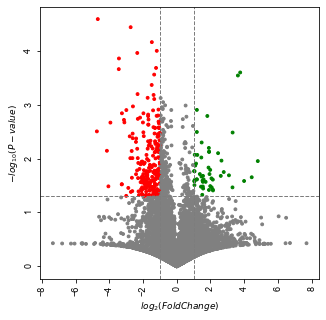

In [201]:
import bioinfokit
from bioinfokit import analys, visuz 

#Create a tuple lists to label the metabolites on plot
zip(subset_filter['Alignment ID'],subset_filter['Average Mz'])
genename = dict(zip(subset_filter['Alignment ID'],subset_filter['Average Mz']))
feature_string = str(genename)
#Create volcano plot
visuz.GeneExpression.volcano(df = subset_filter, lfc = "log2fc", pv= "pvalue", show=True, geneid="Alignment ID", genenames= ({"4756":"983.88416"}),gstyle=2, sign_line=True)



In [198]:
subset_filter.loc[4756,:]

Alignment ID                  4756
Average Rt(min)             10.833
Average Mz               226.10739
Metabolite name            Unknown
Ax #1 0 uM Fe               424500
Ax #2 0 uM Fe               379804
Ax #3 0 uM Fe               341198
ARW1T #2 0.01 uM Fe          36439
ARW1T #1 0.01 uM Fe          33990
ARW1T #3 0.01 uM Fe          36062
Average Group A           381834.0
Average Group B            35497.0
log2fc                   -3.427177
pvalue                    0.000136
Name: 4756, dtype: object

In [196]:
#Extracting significant up and significant down values from  dataset and sorting them in descending order to 
#determine which are the most  significant 
lfc_thr = 1.0
pv_thr = 0.05
features_up = subset_filter[(subset_filter.log2fc > lfc_thr) & (subset_filter.pvalue > pv_thr)]
features_up = features_up.sort_values(by=['log2fc','pvalue'], ascending=False)
features_down = subset_filter[(subset_filter.log2fc < lfc_thr) & (subset_filter.pvalue < pv_thr)]
features_down = features_down.sort_values(by=['log2fc','pvalue'])



In [159]:
features_up

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Ax #1 0 uM Fe,Ax #2 0 uM Fe,Ax #3 0 uM Fe,ARW1T #2 0.01 uM Fe,ARW1T #1 0.01 uM Fe,ARW1T #3 0.01 uM Fe,Average Group A,Average Group B,log2fc,pvalue
28594,28594,23.258,699.59589,Unknown,25191,24110,12591,12791038,16065,25163,2.063067e+04,4.277422e+06,7.695807,0.373903
6160,6160,9.248,253.08511,Unknown,30476,24901,8846,7194,6671663,69903,2.140767e+04,2.249587e+06,6.715389,0.370602
14773,14773,17.526,404.20691,Unknown,1199372,948865,1440216,857806,136993872,183969424,1.196151e+06,1.072737e+08,6.486753,0.125544
19847,19847,1.241,495.83328,Unknown,42818,20117,5169,9547,5917192,38159,2.270133e+04,1.988299e+06,6.452614,0.373660
31790,31790,24.587,819.37555,Unknown,0,6901,112180,59775,4273913,3519820,3.969367e+04,2.617836e+06,6.043322,0.117942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12621,12621,13.975,365.23642,Unknown,46013,188890,42020,33046,307842,213361,9.230767e+04,1.847497e+05,1.001049,0.380948
16298,16298,22.550,432.33221,Unknown,33339,136932,5036,22497,193791,134548,5.843567e+04,1.169453e+05,1.000913,0.414079
23856,23856,21.976,574.43146,Unknown,33557,119019,33482,27338,198328,146650,6.201933e+04,1.241053e+05,1.000775,0.345457
18052,18052,23.305,464.40982,Unknown,2265,77775,2882,3663,63172,99054,2.764067e+04,5.529633e+04,1.000391,0.501168
